In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [17]:
warnings.filterwarnings('ignore')

In [18]:
#We have to get the dataset now

In [19]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("Desktop/ml-100k/u.data", sep = '\t', names = column_names)

In [20]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [21]:
df.shape

(100000, 4)

In [22]:
df['user_id'].nunique()

943

In [23]:
df['item_id'].nunique()

1682

In [24]:
movies_title = pd.read_csv("Desktop/ml-100k/u.item", sep = "\|", header = None)

In [25]:
movies_title.shape

(1682, 24)

In [26]:
movies_title = movies_title[[0,1]]

In [27]:
movies_title.columns =  ['item_id', 'title']

In [28]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [29]:
df = pd.merge(df, movies_title, on="item_id")

In [30]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [31]:
sns.set_style('white')

In [39]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head(n=5)

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [41]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [48]:
ratings_df = pd.DataFrame(df.groupby('title').mean()['rating'])

In [49]:
ratings_df

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [50]:
ratings_df['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [51]:
ratings_df.sort_values(by='rating', ascending = False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


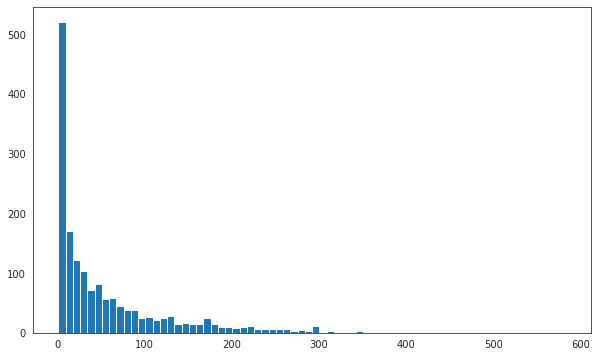

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(ratings_df['num of ratings'], bins = 70)
plt.show()

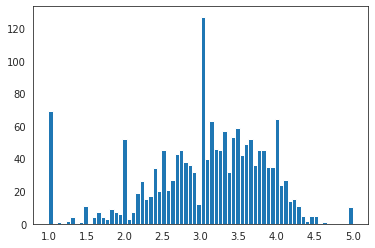

In [55]:
plt.hist(ratings_df['rating'], bins = 70)
plt.show()

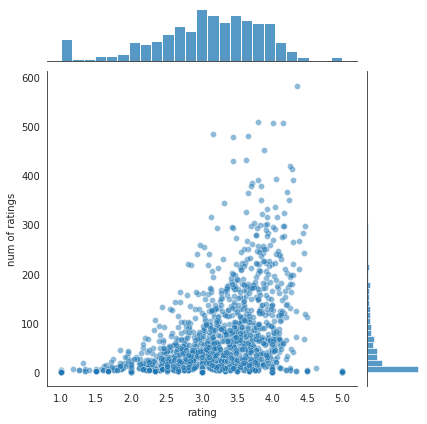

In [57]:
sns.jointplot(x = 'rating', y='num of ratings', data = ratings_df, alpha = 0.5)

In [58]:
#CREATING MOVIE RECOMMENDATION

In [61]:
movieMat = df.pivot_table(index = "user_id", columns = "title", values = "rating")

In [63]:
movieMat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [65]:
ratings_df.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [67]:
starWars_user_ratings = movieMat['Star Wars (1977)']

In [68]:
starWars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [71]:
similar_to_starWars = movieMat.corrwith(starWars_user_ratings)

In [73]:
corr_starWars = pd.DataFrame(similar_to_starWars, columns = ['Correlation'])

In [74]:
corr_starWars.dropna(inplace = True )

In [75]:
corr_starWars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [77]:
corr_starWars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [79]:
corr_starWars = corr_starWars.join(ratings_df['num of ratings'])

In [80]:
corr_starWars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [81]:
corr_starWars[corr_starWars['num of ratings']>100].sort_values('Correlation', ascending = False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [84]:
def predict_movies(movie_name):
    movie_user_ratings = movieMat[movie_name]
    similar_to_movie = movieMat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings_df['num of ratings'])
    pred = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation', ascending = False)
    return pred

In [85]:
predictions = predict_movies("Titanic (1997)")
predictions.head()

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


In [86]:
#search on google to correlate the given data to find out 
#whether the predictions are accurate or not